# E.D.A SOBRE EL DATASET DE EMERGENCIAS 112 EN CYL

Esta es la página web de la que se han obtenido los datos, para la realización de este proyecto.
https://sedeapl.dgt.gob.es/WEB_IEST_CONSULTA/informePersonalizadoCaptcha.faces 


Lo primero que tenemos que hacer para la correcta realización del EDA es cargar las librerías de análisis de datos como *pandas* y *numpy*.


In [59]:
# Comando para la instalación de las librerías necesarias
!pip install matplotlib keras tensorflow scikit-learn seaborn pandas plotly

Una vez realizada las instalaciones de las librerías, es neceario importarlas.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis Exploratorio de Datos

### Cambios previos en el fichero de datos.

Necesitaremos realizar cambios en el fichero ya que necesitamos que el campo de Edad sea un número entero y no un rango, por ello estableceremos los valores en grupos del 0 al 8 en funcion de los rangos:

0 - 14 -> 0 | 
15 - 24 -> 1 | 
25 - 34 -> 2 | 
35 - 44 -> 3 | 
45 - 54 -> 4 | 
55 - 64 -> 5 | 
65 - 74 -> 6 | 
75 - 84 -> 7 | 
+85 -> 8 


### Importar los datos

Lo primero que tenemos que hacer es cargar el dataset de la DGT de accidentes de tráfico. En este dataset es necesario tener en cuenta que existen caracteres como acentos y letras como la ñ, por ello tendremos que utilizar encoding, inidicando el tipo de codificado ya que por defecto el codificado es UTF-8, y entonces da error al intentar procesar los datos.

Una vez cargado utilizaremos la función .head(), para visualizar los primeros registros.

In [61]:
# Cargar el dataset de emergencias del 112 en CYL
data = pd.read_csv(".\dataset\Accidentes.csv", encoding="cp1252", sep=";")

#Antes de nada borramos los valores nulos
data_clean = data.dropna()

# Convertir la columna 'Edad' a tipo 'Int64'
# data_clean['Edad'] = data_clean['Edad'].astype('Int64')

# Visualizar los primeros registros
data_clean.head()

,Tipo de vehículo,Accesorios de seguridad,Tipo Accidente,Sexo,Edad,Muertos,Graves,Leves,Accidentes,Victimas
1,Ambulancia,NINGUNO,Atropello a peatón,Hombre,1.0,0,0,0,1,0
2,Ambulancia,NINGUNO,Atropello a peatón,Hombre,3.0,0,0,0,1,0
4,Ambulancia,NINGUNO,Atropello a peatón,Mujer,2.0,0,0,0,1,0
5,Ambulancia,NINGUNO,Colisión lateral y frontolateral,Hombre,1.0,0,1,2,7,3
6,Ambulancia,NINGUNO,Colisión lateral y frontolateral,Hombre,2.0,0,0,8,15,8


## Limpieza de datos del dataset de accidentes de la DGT.

Lo primero que tenemos que hacer es limpiar los datos del dataset de accidentes de la DGT. Buscaremos que los valores nulos desaparezcan.
Para ello primero pediremos que nos muestre el tipo de dato de cada columna del dataset.

In [62]:
# Vemos los tipos de dato de cada columna del dataset
data_clean.dtypes

Tipo de vehículo            object
Accesorios de seguridad     object
Tipo Accidente              object
Sexo                        object
Edad                       float64
Muertos                      int64
Graves                       int64
Leves                        int64
Accidentes                   int64
Victimas                     int64
dtype: object

A continuación, verificaremos el tamaño del dataset. El atributo shape nos permitirá saber el tamaño del DataFrame. 

El resultado que mostrará indicará (número de filas, número de columnas).

In [63]:
#Comprobamos el tamaño del dataset.
data_clean.shape

(4027, 10)

Para saber los valores únicos de la columna de Tipo Accidente tenremos que usar la función .unique().

In [64]:
data_clean['Tipo Accidente'].unique()

array(['Atropello a peatón', 'Colisión lateral y frontolateral',
       'Colisión por alcance y múltiple', 'Otro tipo de accidente',
       'Salida de la vía', 'Colisión frontal', 'Vuelco en la calzada'],
      dtype=object)

Mediante el uso de la librería de Sklearn (train_test_split), dividiremos los valores en conjunto de entrenamiento y conjunto de testing.

In [65]:
# Importamos la libreria de sklearn para realizar el split de los datos.
from sklearn.model_selection import train_test_split

# Separamos los datos en entrenamiento y prueba.
data_train, data_text = train_test_split(data_clean, test_size=0.2, stratify=data_clean['Tipo Accidente'])

Comprobamos si queda algun valor nulo en los datos.

In [66]:
for column in data_train.columns:
    num_nulls = data_train[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "Tipo de vehículo" has 0 nulls
Column "Accesorios de seguridad" has 0 nulls
Column "Tipo Accidente" has 0 nulls
Column "Sexo" has 0 nulls
Column "Edad" has 0 nulls
Column "Muertos" has 0 nulls
Column "Graves" has 0 nulls
Column "Leves" has 0 nulls
Column "Accidentes" has 0 nulls
Column "Victimas" has 0 nulls


Comprobamos si hay filas duplicadas en los datos.

In [67]:

hay_duplicados = data_train.duplicated().any()
print(f"¿Hay filas duplicadas en el DataFrame?: {hay_duplicados}")

¿Hay filas duplicadas en el DataFrame?: False


## Análisis de Clase

En este poceso lo primero que tenemos que hacer es realizar el análisis de la clase de incidencia de cada variable posible en la columna 'Tipo Accidente'.

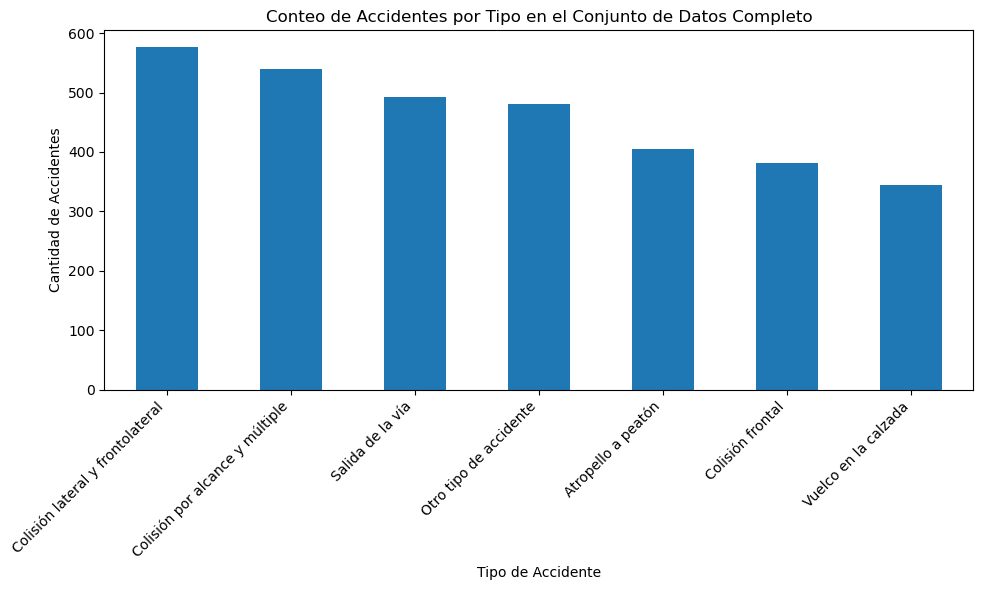

In [68]:
# Realizamos el conteo de cada tipo de incidente en el conjunto de datos completo
conteo_tipos = data_train['Tipo Accidente'].value_counts()

# Creamos un gráfico de barras con esta información
plt.figure(figsize=(10, 6))
conteo_tipos.plot(kind='bar')
plt.title('Conteo de Accidentes por Tipo en el Conjunto de Datos Completo')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Cantidad de Accidentes')
# Rota las etiquetas del eje X para mejor lectura
plt.xticks(rotation=45, ha='right')
# Ajusta automáticamente los parámetros de la figura para que quepa todo
plt.tight_layout()
plt.show()


Como podemos observar los tipos de accidentes y el número de veces que aparece cada uno de ellos.

In [69]:
data_train['Tipo Accidente'].value_counts()

Tipo Accidente
Colisión lateral y frontolateral    576
Colisión por alcance y múltiple     539
Salida de la vía                    493
Otro tipo de accidente              481
Atropello a peatón                  405
Colisión frontal                    382
Vuelco en la calzada                345
Name: count, dtype: int64

## Análisis Bivariante

Una vez se ha comprobado como se comportan los datos por sí mismos, nos interesa ver cómo se comportan los datos en relación a los demás. Como las 4 variables independientes son numéricas, podemos utilizar un "pequeño truco" para graficar rápidamente las relaciones entre todas ellas utilizando un **pairplot** de Seaborn. En la práctica, si hay muchas variables, es posible que antes tengamos que hacer, por ejemplo, un estudio de correlación que nos permita quitar algunas variables irrelevantes, para analizar únicamente las variables relevantes y/o correladas.

d:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


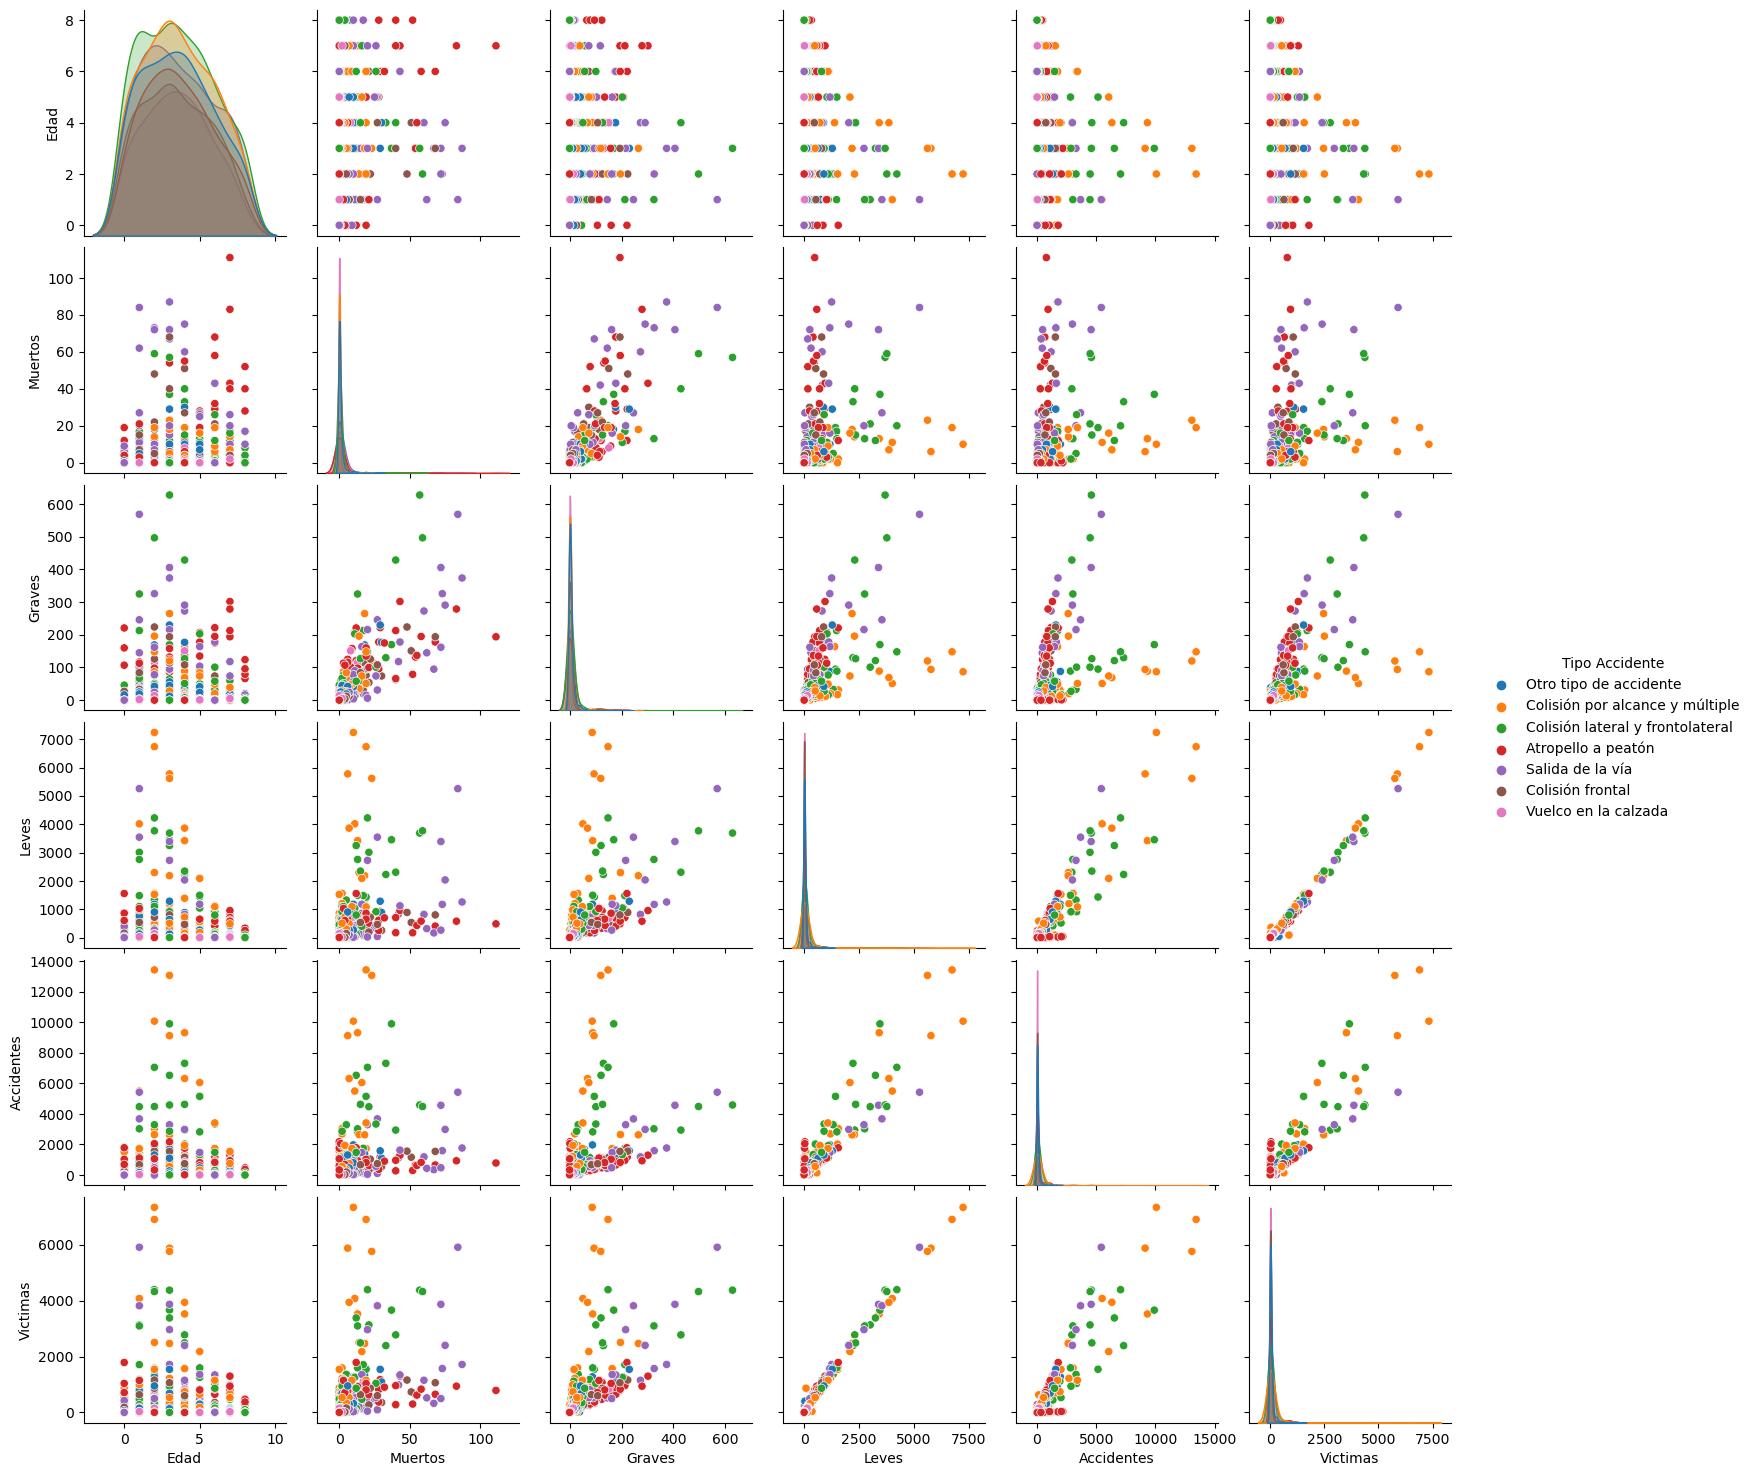

In [71]:
sns.pairplot(data_train, hue='Tipo Accidente')

<Axes: >

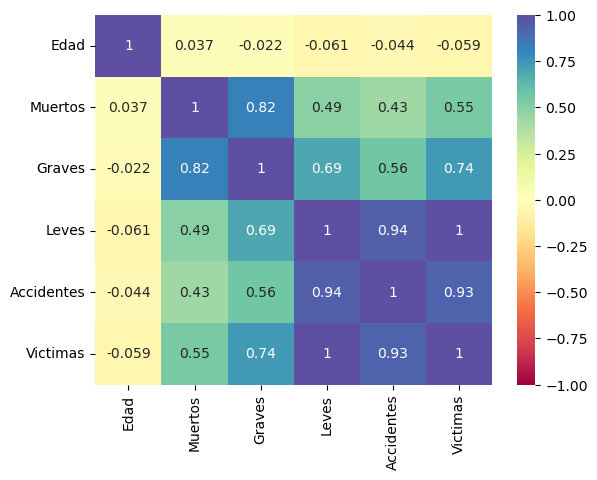

In [72]:
sns.heatmap(data_train.corr(numeric_only=True), vmin=-1, vmax=1, cmap='Spectral', annot=True)

<Axes: >

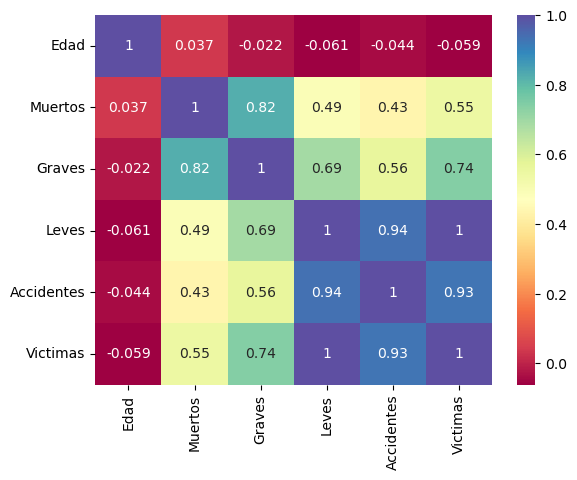

In [73]:
sns.heatmap(data_train.corr(numeric_only=True), cmap='Spectral', annot=True)